<a href="https://colab.research.google.com/github/merniesgugh/CoderHouse-DS/blob/main/Visualizaci%C3%B3n_Mernies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:

### Resumen del Dataset:
1. **Estructura General**:
   - El dataset contiene 89 columnas y mas de 18 mil registros, está relacionado con datos de los jugadores de la última edición del videojuego FIFA 2019, tiene datos tales como sus atributos físicos, habilidades, contratos y posición en el campo.
   
2. **Principales Atributos**:
   - **Datos básicos**: El dataset incluye columnas como `Name` (nombre del jugador), `Age` (edad), `Nationality` (nacionalidad), y `Club` (equipo al que pertenece el jugador).
   - **Habilidades**: Hay varias columnas que describen las habilidades de los jugadores, como `Overall` (calificación general), `Potential` (potencial futuro), y atributos específicos de habilidades como `Composure` (compostura), `StandingTackle` (entrada en pie), y `SlidingTackle` (entrada deslizante).
   - **Arqueros**: Existen atributos relacionados con habilidades de arqueros como `GKDiving`, `GKHandling`, `GKKicking`, `GKPositioning`, y `GKReflexes`.
   
3. **Datos financieros**:
   - El dataset también contiene una columna llamada `Release Clause`, que indica el valor de la cláusula de rescisión de cada jugador, expresado en millones de euros.

**Algunas Hipótesis inciales:**

Luego de analizar los datos, hay algunas hipótesis inciales que considero ineresantes evaluar:

1. **Hipótesis 1: La edad influye significativamente en el potencial de los jugadores.** Como vimos en la matriz de correlación, hay una correlación negativa entre la edad y el potencial. Esto sugiere que los jugadores más jóvenes tienden a tener un mayor potencial. Podrías plantear que la edad es un buen predictor del potencial de un jugador.

2. **Hipótesis 2: Las habilidades técnicas (como Compostura, Marcaje, etc.) predicen la calificación general (Overall)**.En la matriz de correlación, vemos una fuerte correlación positiva entre Compostura y Calificación General. Esta relación podría extenderse a otras habilidades como Marcación, Tiros, Pase, Regate, entre otras. La idea sería que las habilidades técnicas específicas de un jugador predicen en gran medida su calificación general.

3. **Hipótesis 3: El valor económico de un jugador (Release Clause o Wage) está relacionado con su calificación general y potencial.** En el mundo del fútbol (que pretende simular este juego), el valor de mercado de un jugador generalmente está relacionado con su habilidad actual (calificación general) y su potencial. Jugadores con una calificación alta y un alto potencial tienden a tener valores de mercado y sueldos más altos.
   

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el dataset
# Specify the encoding as 'latin1' to handle potential special characters
df = pd.read_csv('https://raw.githubusercontent.com/merniesgugh/CoderHouse-DS/main/kl.csv', encoding='latin1')


Aquí se importan las bibliotecas pandas y matplotlib.pyplot, necesarias para trabajar con datos y visualizarlos. Luego carga el archivo CSV (kl.csv) desde una URL de GitHub en un DataFrame de pandas, manejando la codificación 'latin1' que permite leer caracteres especiales para evitar posibles errores al leer el archivo, dado que aquí hay caracteres con tildes y otros caracteres especiales como la ñ, entre otros.


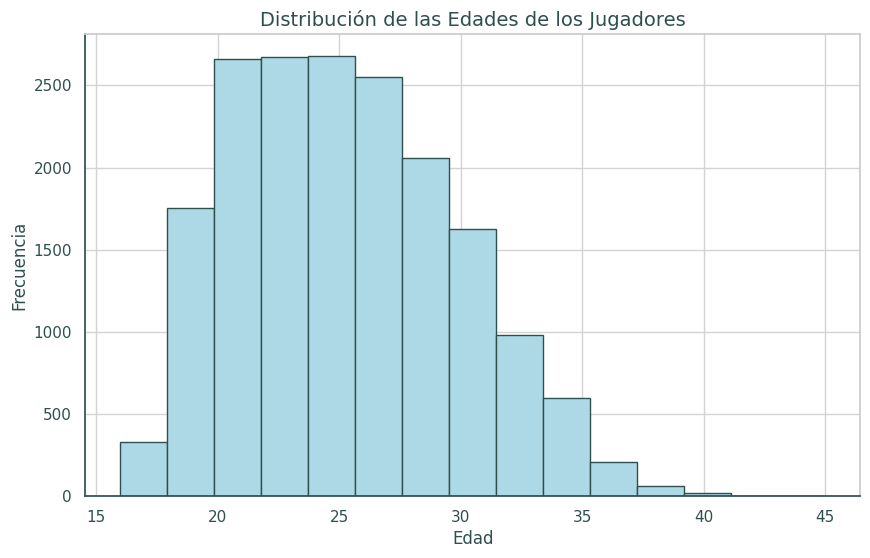

In [15]:
#Histograma de edades: Este gráfico muestra cómo se distribuyen las edades de los jugadores en el dataset.

import matplotlib.pyplot as plt

# Eliminar filas con valores nulos en la columna de edad
df = df.dropna(subset=['Age'])

# Definir los colores FIFA 19
fifa_azul_suave = '#ADD8E6'   # Azul claro más suave
fifa_gris_claro = '#D3D3D3'   # Gris claro para el fondo
fifa_gris_oscuro = '#2F4F4F'  # Gris oscuro para texto y bordes

# Crear un histograma de la distribución de edades con colores de FIFA 19
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=15, color=fifa_azul_suave, edgecolor=fifa_gris_oscuro)
plt.title('Distribución de las Edades de los Jugadores', color=fifa_gris_oscuro, fontsize=14)
plt.xlabel('Edad', color=fifa_gris_oscuro, fontsize=12)
plt.ylabel('Frecuencia', color=fifa_gris_oscuro, fontsize=12)
plt.grid(True, color=fifa_gris_claro)

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color(fifa_gris_oscuro)
plt.gca().spines['left'].set_color(fifa_gris_oscuro)
plt.gca().tick_params(axis='x', colors=fifa_gris_oscuro)
plt.gca().tick_params(axis='y', colors=fifa_gris_oscuro)

# Mantener el fondo blanco
plt.gca().set_facecolor('white')
plt.show()



De este histograma se pueden sacar algunas conclusiones sobre la distribución de edades de los jugadores:

1. Mayor concentración entre los 20 y 30 años:
La mayor parte de los jugadores se encuentra en el rango de edades entre 20 y 30 años, con un pico claro entre los 22 y 26 años. Podríamos decir que la mayoría de los jugadores en este dataset están en la parte media de sus carreras.
2. Colas:
Hay un número significativamente menor de jugadores menores de 18 años y mayores de 35 años.
3. Disminución gradual después de los 30 años:
Después de los 30 años, la cantidad de jugadores disminuye de manera consistente. Esto podría reflejar el hecho de que muchos jugadores suelen retirarse o tener un menor rendimiento físico una vez que alcanzan los 30-35 años.
4. Cola larga hacia los 35-40 años:
Aunque hay menos jugadores en el rango de 35-40 años, todavía existe una pequeña cantidad, lo que indica que algunos jugadores siguen compitiendo a niveles altos incluso después de los 35 años.

En general pordíamos decir que se observa una distribución sesgada hacia la izquierda, donde la mayoría de los jugadores están en sus años más productivos (20-30 años). Los jugadores fuera de este rango de edad (menores de 18 o mayores de 35) son menos comunes, pero si están presentes en el dataset.

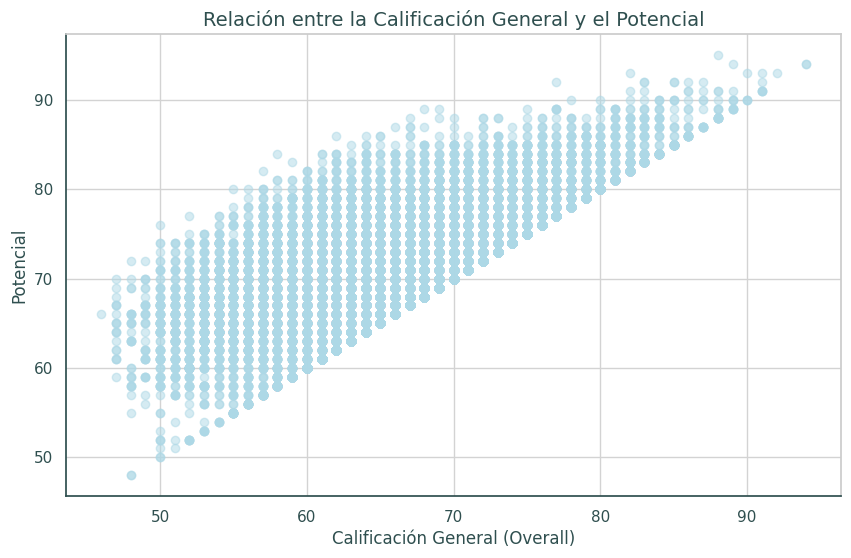

In [16]:
#Gráfico de dispersión (Overall vs. Potential): Este gráfico permite observar la relación entre la calificación general de un jugador y su potencial.

import matplotlib.pyplot as plt

# Eliminar filas con valores nulos en las columnas 'Overall' y 'Potential'
df = df.dropna(subset=['Overall', 'Potential'])

# Definir los colores FIFA 19
fifa_azul_suave = '#ADD8E6'   # Azul claro más suave
fifa_gris_claro = '#D3D3D3'   # Gris claro para el fondo
fifa_gris_oscuro = '#2F4F4F'  # Gris oscuro para texto y bordes

# Crear un gráfico de dispersión con colores FIFA 19
plt.figure(figsize=(10, 6))
plt.scatter(df['Overall'], df['Potential'], alpha=0.5, color=fifa_azul_suave)
plt.title('Relación entre la Calificación General y el Potencial', color=fifa_gris_oscuro, fontsize=14)
plt.xlabel('Calificación General (Overall)', color=fifa_gris_oscuro, fontsize=12)
plt.ylabel('Potencial', color=fifa_gris_oscuro, fontsize=12)
plt.grid(True, color=fifa_gris_claro)

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color(fifa_gris_oscuro)
plt.gca().spines['left'].set_color(fifa_gris_oscuro)
plt.gca().tick_params(axis='x', colors=fifa_gris_oscuro)
plt.gca().tick_params(axis='y', colors=fifa_gris_oscuro)

# Mantener el fondo blanco
plt.gca().set_facecolor('white')
plt.show()



En este gráfico de dispersión, se muestra la relación entre la Calificación General (Overall) y el Potencial de los jugadores.

De este gráfico se pueden sacar algunas conclusiones:

1. Correlación positiva fuerte:
Existe una clara correlación positiva entre la calificación general y el potencial de los jugadores. En otras palabras, a medida que la calificación general de un jugador aumenta, su potencial también tiende a ser más alto. Esto es evidente por la tendencia ascendente de los puntos en la gráfica.
Los jugadores con calificaciones más altas (en el eje X) también tienen potenciales altos (en el eje Y), lo que indica que los jugadores mejor valorados también tienen más probabilidades de tener un gran rendimiento futuro.
2. Variabilidad en jugadores con calificaciones bajas:
Para jugadores con calificación general baja (entre 50 y 60), se observa una mayor dispersión en los valores de potencial.
3. Estabilidad en jugadores con calificaciones más altas:
A medida que los jugadores alcanzan calificaciones generales más altas (más de 80), se observa una menor dispersión en el potencial. Los jugadores con calificación general alta tienden a tener potenciales muy cercanos a su calificación actual, lo que indica que están más cerca de alcanzar su máximo rendimiento o que ya lo han hecho.
4. Potencial por encima de la calificación general:
La mayoría de los puntos en el gráfico están por encima de la diagonal, lo que indica que el potencial de los jugadores suele ser mayor que su calificación general actual. Esto es común en juegos como FIFA, donde los jugadores jóvenes tienen la capacidad de mejorar con el tiempo y eventualmente alcanzar su máximo potencial.

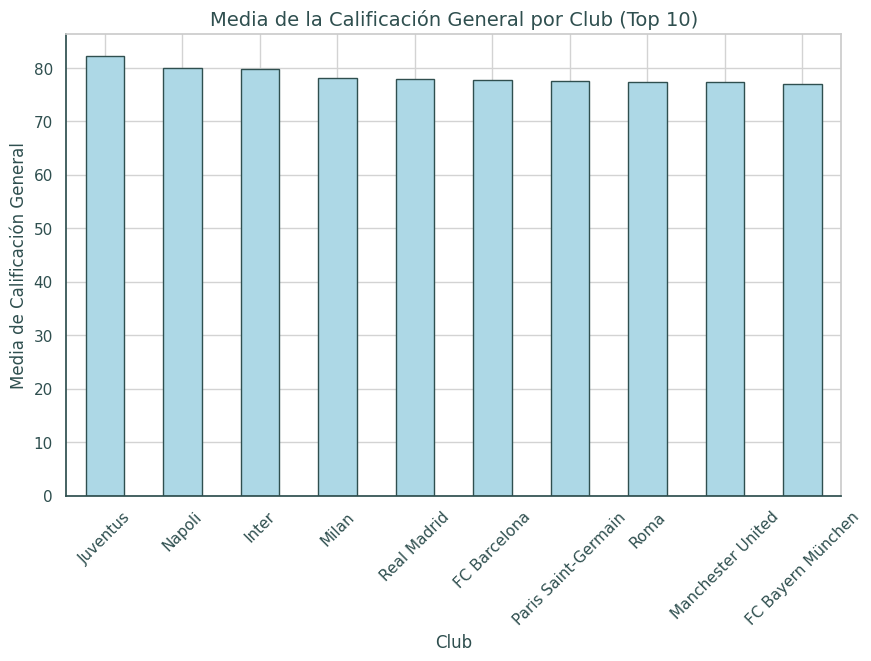

In [17]:
#Gráfico de barras (media de calificación por club): Aquí se puede ver la media de las calificaciones generales de los jugadores de los 10 principales clubes, ordenados por esta media.

import matplotlib.pyplot as plt

# Agrupar los datos por club y calcular la media de la calificación general (Overall)
club_media_general = df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)

# Definir los colores FIFA 19
fifa_azul_suave = '#ADD8E6'   # Azul claro más suave
fifa_gris_claro = '#D3D3D3'   # Gris claro para el fondo
fifa_gris_oscuro = '#2F4F4F'  # Gris oscuro para texto y bordes

# Crear un gráfico de barras con colores FIFA 19
plt.figure(figsize=(10, 6))
club_media_general.plot(kind='bar', color=fifa_azul_suave, edgecolor=fifa_gris_oscuro)
plt.title('Media de la Calificación General por Club (Top 10)', color=fifa_gris_oscuro, fontsize=14)
plt.xlabel('Club', color=fifa_gris_oscuro, fontsize=12)
plt.ylabel('Media de Calificación General', color=fifa_gris_oscuro, fontsize=12)
plt.xticks(rotation=45, color=fifa_gris_oscuro)
plt.yticks(color=fifa_gris_oscuro)
plt.grid(True, color=fifa_gris_claro)

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color(fifa_gris_oscuro)
plt.gca().spines['left'].set_color(fifa_gris_oscuro)

# Mantener el fondo blanco
plt.gca().set_facecolor('white')
plt.show()



En el gráfico se muestra la comparación de la media de la calificación general de los jugadores en los 10 mejores clubes del dataset de este juego.

Según esta visualización podrían derivar algunas observaciones y conslusiones:

1. Alta consistencia en las calificaciones promedio:
Todos los clubes en el gráfico tienen una calificación promedio cercana a 80, lo que indica que estos equipos están formados por jugadores de un nivel muy alto y que no hay grandes diferencias entre ellos en cuanto al promedio de habilidades.
2. Juventus tiene la calificación promedio más alta:
Juventus sobresale ligeramente en el gráfico, teniendo la calificación general más alta de los clubes mostrados. Esto sugiere que, en el dataset, Juventus tiene un equipo de jugadores más equilibrados en cuanto a habilidades generales en comparación con los otros equipos.
3. Pequeñas diferencias entre los clubes principales:
Aunque hay variaciones menores, las diferencias en la calificación general promedio entre los clubes son relativamente pequeñas, lo que implica que (para los desarrolladores de este juego y según la información del dataset) los equipos como Napoli, Inter, Real Madrid, FC Barcelona y PSG están igualmente competitivos en cuanto a las habilidades de sus jugadores.
4. Representación de las ligas más fuertes:
Los clubes representados pertenecen a las ligas de fútbol más prestigiosas de Europa, como la Serie A (Juventus, Napoli, Inter, Milan, Roma), la LaLiga (Real Madrid, FC Barcelona), la Ligue 1 (Paris Saint-Germain), la Premier League (Manchester United), y la Bundesliga (FC Bayern München). Esto refuerza la idea de que las ligas más poderosas tienden a tener los mejores equipos, con jugadores de alto rendimiento, repito, según la información contenida en este dataset.
5. Distribución similar entre varios equipos:
Equipos como Napoli, Inter, y Milan tienen casi la misma calificación promedio, lo que puede reflejar una mayor paridad en la Serie A italiana.

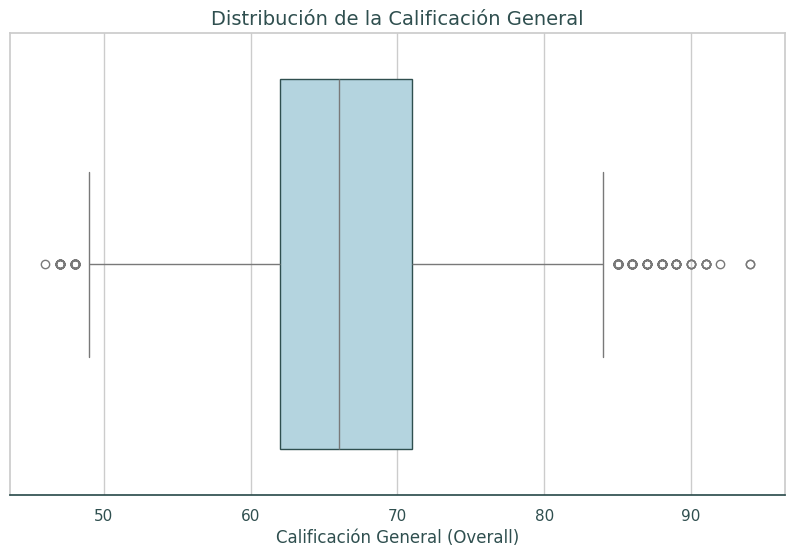

In [18]:
# AHORA USANDO SEABORN

import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar filas con valores nulos en la columna 'Overall'
df = df.dropna(subset=['Overall'])

# Definir los colores FIFA 19
fifa_azul_suave = '#ADD8E6'   # Azul claro más suave
fifa_gris_claro = '#D3D3D3'   # Gris claro para el fondo
fifa_gris_oscuro = '#2F4F4F'  # Gris oscuro para texto y bordes

# Crear un boxplot de la calificación general (Overall) con colores FIFA 19
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Aplicar colores al boxplot
sns.boxplot(data=df, x='Overall', color=fifa_azul_suave, boxprops=dict(edgecolor=fifa_gris_oscuro))

# Personalizar el gráfico
plt.title('Distribución de la Calificación General', color=fifa_gris_oscuro, fontsize=14)
plt.xlabel('Calificación General (Overall)', color=fifa_gris_oscuro, fontsize=12)

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color(fifa_gris_oscuro)
plt.gca().tick_params(axis='x', colors=fifa_gris_oscuro)
plt.gca().tick_params(axis='y', colors=fifa_gris_oscuro)

# Mantener el fondo blanco
plt.gca().set_facecolor('white')

plt.show()



Comentario genera de este boxplot, aquí se observa que la mayoría de los jugadores tienen calificaciones generales (Overall) entre 60 y 75, lo que representa una distribución bastante centrada en jugadores de nivel medio. Los valores atípicos muestran la presencia de un pequeño grupo de jugadores excepcionales (con calificaciones superiores a 80) que destacan en este dataset. Además, también hay algunos jugadores con calificaciones muy bajas (por debajo de 50), pero estos son menos comunes.

Algunas observaciones:
1. Mediana de la calificación general:
La línea central dentro de la caja representa la mediana de la calificación general de los jugadores, dado que está justo por encima de 65-70 puntos, esto nos dice que el 50% de los jugadores tienen una calificación general dentro de este rango o inferior, lo que podría representar a jugadores de nivel medio o regular.
2. Rango intercuartílico (IQR):
Como vimos en clase, el tamaño de la caja representa el rango intercuartílico (IQR), que cubre el 50% de los datos, es decir, desde el primer cuartil (Q1, el 25% inferior) hasta el tercer cuartil (Q3, el 75% superior). Esto significa que el 50% de los jugadores tienen calificaciones generales en el rango aproximado de 60 a 75.
Este rango sugiere que la mayoría de los jugadores están concentrados en un nivel intermedio en cuanto a sus calificaciones generales.
3. Valores atípicos (outliers):
Los puntos fuera de los "bigotes" del gráfico representan valores atípicos, es decir, jugadores que tienen calificaciones mucho más altas o más bajas que la mayoría.
A la derecha del boxplot, hay varios puntos dispersos por encima de 80, lo que indica que existen jugadores de alto rendimiento, con calificaciones significativamente superiores a la mediana del grupo.
A la izquierda, también se ven algunos puntos por debajo de 50, lo que muestra la existencia de jugadores con calificaciones excepcionalmente bajas.
4. Simetría y distribución de los datos:
El boxplot muestra que la distribución está algo sesgada hacia la derecha (calificaciones más altas), ya que el "bigote" superior es más largo y existen más valores atípicos por encima de 80 que por debajo de 50. Esto sugiere que, aunque la mayoría de los jugadores tienen calificaciones promedio o medianas, hay un pequeño grupo de jugadores de élite con calificaciones bastante superiores.
5. Rango total de calificaciones:
El "bigote" inferior se extiende hasta cerca de 45, mientras que el superior se extiende hasta alrededor de 80, lo que significa que el rango de las calificaciones generales de los jugadores está en su mayoría entre 45 y 80.
Aunque los jugadores fuera de este rango son considerados valores atípicos, es importante destacar que los jugadores con calificaciones superiores a 80 están en el grupo más reducido, lo que refleja que son jugadores de un alto nivel.



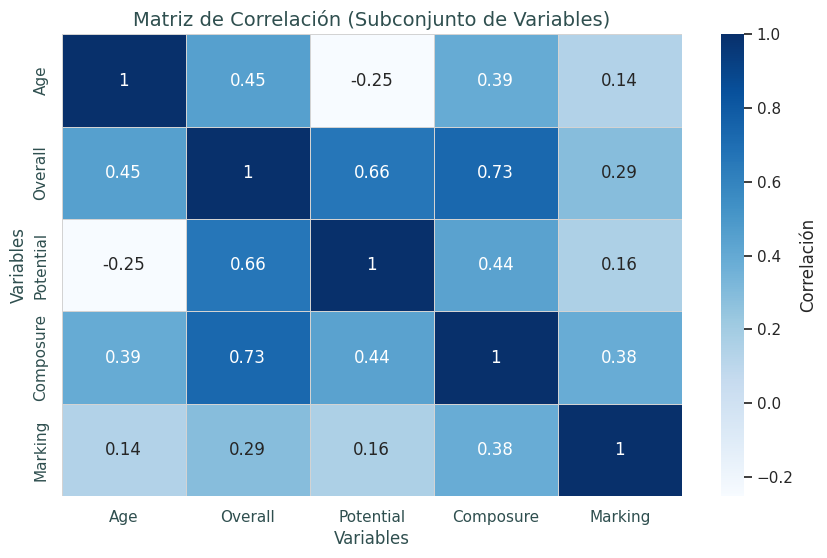

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo algunas columnas numéricas relevantes
df_subconjunto = df[['Age', 'Overall', 'Potential', 'Composure', 'Marking']].dropna()

# Crear una matriz de correlación para este subconjunto
matriz_correlacion = df_subconjunto.corr()

# Definir los colores FIFA 19
fifa_gris_claro = '#D3D3D3'   # Gris claro para líneas
fifa_gris_oscuro = '#2F4F4F'  # Gris oscuro para texto
fifa_azul_suave = '#ADD8E6'   # Azul claro suave para elementos

# Generar el heatmap con colores FIFA 19
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="Blues", linewidths=0.5, linecolor=fifa_gris_claro, cbar_kws={'label': 'Correlación'})

# Personalizar el gráfico
plt.title('Matriz de Correlación (Subconjunto de Variables)', color=fifa_gris_oscuro, fontsize=14)

# Cambiar el color de los ejes
plt.xlabel('Variables', color=fifa_gris_oscuro)
plt.ylabel('Variables', color=fifa_gris_oscuro)

plt.xticks(color=fifa_gris_oscuro)
plt.yticks(color=fifa_gris_oscuro)

plt.show()



Este gráfico es un mapa de calor (heatmap) que muestra la matriz de correlación entre cinco variables del dataset: Edad (Age), Calificación General (Overall), Potencial (Potential), Compostura (Composure), y Marcación (Marking). Las correlaciones van desde -1 (correlación negativa perfecta) hasta 1 (correlación positiva perfecta).

A partir de este gráfico, podríamos extraer estas tres conclusiones:

1. Fuerte correlación entre Compostura y Calificación General:
Existe una alta correlación positiva (0.73) entre la Compostura (Composure) y la Calificación General (Overall). Esto sugiere que los jugadores con mayor calificación general también tienden a tener una compostura alta, lo cual tiene sentido ya que la compostura suele ser una característica clave en jugadores de élite que mantienen la calma bajo presión.
2. Correlación negativa entre Edad y Potencial:
Hay una correlación negativa (aunque baja) de -0.25 entre la Edad (Age) y el Potencial (Potential). Esto indica que los jugadores más jóvenes tienden a tener un mayor potencial, lo que es algo que en general sucede en deportes como el fútbol, donde los jugadores más jóvenes son vistos como promesas futuras con espacio para mejorar. A medida que los jugadores envejecen, su potencial disminuye ya que se acercan o alcanzan su pico de rendimiento.
3. Correlación positiva entre Calificación General y Potencial:
La correlación entre la Calificación General (Overall) y el Potencial (Potential) es moderadamente alta, con un valor de 0.66. Esto significa que los jugadores con una calificación general alta tienden a tener un alto potencial, lo que sugiere que los jugadores que ya son buenos también tienen la capacidad de mejorar aún más en el futuro. Esto también lo observamos en el segundo gráfico presentado, el gráfico de dispersión que apoya también esta correlacion.

<ipython-input-20-7f22b1f7a196>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Grupo_Calificacion', y='Age', data=df_filtrado, palette=[fifa_azul_suave])
<ipython-input-20-7f22b1f7a196>:18: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='Grupo_Calificacion', y='Age', data=df_filtrado, palette=[fifa_azul_suave])


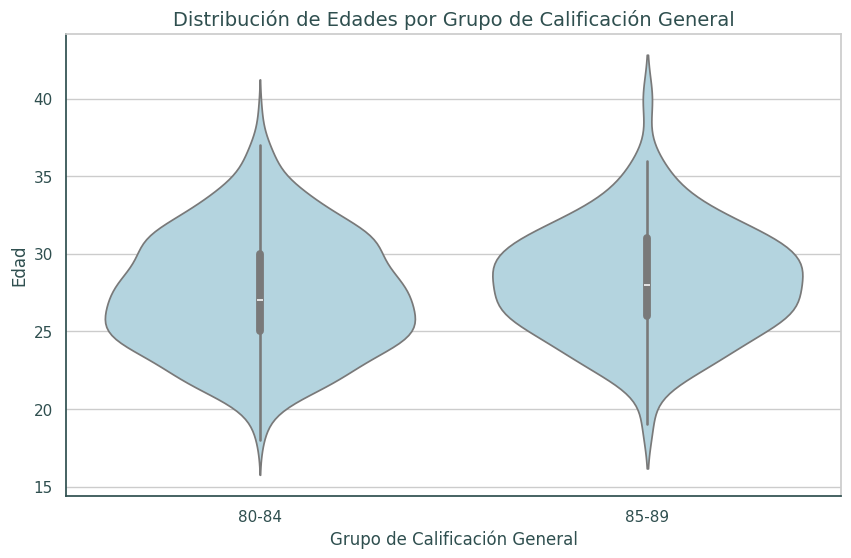

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los datos para jugadores con Overall entre 80 y 90
df_filtrado = df[(df['Overall'] >= 80) & (df['Overall'] <= 90)].copy()  # Copia explícita del DataFrame filtrado

# Crear una nueva columna que agrupe los valores de 'Overall' en intervalos de 5 puntos
df_filtrado['Grupo_Calificacion'] = pd.cut(df_filtrado['Overall'], bins=[79, 84, 89], labels=['80-84', '85-89'])

# Definir los colores FIFA 19
fifa_azul_suave = '#ADD8E6'   # Azul claro más suave
fifa_gris_claro = '#D3D3D3'   # Gris claro para el fondo
fifa_gris_oscuro = '#2F4F4F'  # Gris oscuro para texto y bordes

# Crear un violinplot simplificado para la distribución de edades en estos grupos de calificación general con colores FIFA 19
plt.figure(figsize=(10, 6))
sns.violinplot(x='Grupo_Calificacion', y='Age', data=df_filtrado, palette=[fifa_azul_suave])

# Personalizar el gráfico
plt.title('Distribución de Edades por Grupo de Calificación General', color=fifa_gris_oscuro, fontsize=14)
plt.xlabel('Grupo de Calificación General', color=fifa_gris_oscuro, fontsize=12)
plt.ylabel('Edad', color=fifa_gris_oscuro, fontsize=12)

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color(fifa_gris_oscuro)
plt.gca().spines['left'].set_color(fifa_gris_oscuro)
plt.gca().tick_params(axis='x', colors=fifa_gris_oscuro)
plt.gca().tick_params(axis='y', colors=fifa_gris_oscuro)

# Mantener el fondo blanco
plt.gca().set_facecolor('white')

plt.show()



Visualización Violin Plot:
Al crear y analizar el violinplot que muestra la distribución de las edades de los jugadores en relación con su calificación general (Overall) agrupada en intervalos (80-84 y 85-89), podemos sacar varias conclusiones:

1. Rango de edades similar en ambos grupos:
Las distribuciones de edad en ambos grupos de calificación general son bastante amplias, pero tienden a agruparse alrededor de un rango común, aproximadamente entre los 25 y 30 años. Esto indica que, en general, los jugadores con calificaciones generales entre 80 y 89 suelen estar en la etapa media de sus carreras.
2. Menos jugadores más jóvenes y mayores en estos rangos:
La forma de los "violines" tiende a ser más angosta en los extremos, lo que sugiere que hay menos jugadores muy jóvenes o mayores (por ejemplo, menores de 22 o mayores de 35) en estos grupos de calificación. Esto podría indicar que los jugadores con puntuaciones generales entre 80-89 tienden a estar en la "madurez" de sus carreras futbolísticas.
3. Pequeña diferencia en la dispersión entre los grupos:
El grupo con calificación general 85-89 parece tener una dispersión ligeramente menor en las edades que el grupo 80-84. Esto podría sugerir que los jugadores de élite (con calificaciones más altas) tienden a estar en un rango de edad más estrecho, lo cual es esperable ya que los jugadores tienden a alcanzar su nivel máximo de rendimiento en ciertos años de su carrera.
4. Simetría en las distribuciones:
Ambas distribuciones parecen relativamente simétricas, lo que indica que no hay un sesgo evidente hacia jugadores más jóvenes o mayores en estos rangos de calificación. Esto sugiere que en los grupos de calificación entre 80-89, la distribución de edad está bastante balanceada.
En resumen, el gráfico muestra que los jugadores en los rangos de calificación 80-89 suelen estar en la etapa media de sus carreras, con una ligera tendencia a que los jugadores con calificaciones más altas (85-89) sean de un rango de edad algo más concentrado, pero no hay grandes diferencias extremas entre los grupos.






